1. Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Pour gérer les valeurs manquantes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

2. Chargement des données

In [2]:
project_root = r'C:\Users\Marouane\ImmoPredict'
features_path = os.path.join(project_root, 'data', 'processed', 'dvf_features.csv')
df = pd.read_csv(features_path)
print(f"Dimensions initiales: {df.shape}")

C:\Users\Marouane\AppData\Local\Temp\ipykernel_4048\2132072670.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(features_path)


Dimensions initiales: (580444, 130)


3. Sélectionner uniquement les colonnes numériques

In [3]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df = df[numeric_cols]
print(f"Dimensions après sélection des colonnes numériques: {df.shape}")

Dimensions après sélection des colonnes numériques: (580444, 20)


4. Vérification des valeurs manquantes

In [4]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Nombre': missing_values, 'Pourcentage (%)': missing_percent})
print("\nValeurs manquantes par colonne:")
print(missing_df[missing_df['Nombre'] > 0].sort_values('Pourcentage (%)', ascending=False))


Valeurs manquantes par colonne:
          Nombre  Pourcentage (%)
2eme lot  580444            100.0


5. Préparation pour la modélisation

In [6]:
# Définition de la variable cible
target = 'Valeur fonciere'  # Cette ligne manquait

# Vérifier si la variable cible existe
if target not in df.columns:
    print(f"ERREUR: La colonne cible '{target}' n'existe pas dans le dataset!")
    print(f"Colonnes disponibles: {df.columns.tolist()}")
else:
    # Vérifier si la variable cible a des valeurs manquantes
    if df[target].isnull().sum() > 0:
        print(f"ATTENTION: La variable cible a {df[target].isnull().sum()} valeurs manquantes.")
        print("Suppression des lignes avec des valeurs manquantes dans la variable cible...")
        df = df.dropna(subset=[target])
        print(f"Dimensions après suppression: {df.shape}")
    
    # Sélection des features (toutes les colonnes sauf la cible)
    features = [col for col in df.columns if col != target]
    
    # Définition des features et de la cible
    X = df[features]
    y = df[target]
    
    print(f"\nNombre de features: {len(features)}")


Nombre de features: 19


6. Division en ensembles d'entraînement et de test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")

Taille de l'ensemble d'entraînement: (464355, 19)
Taille de l'ensemble de test: (116089, 19)


7. Imputation des valeurs manquantes

In [9]:
print("\nImputation des valeurs manquantes...")
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


Imputation des valeurs manquantes...


c:\Users\Marouane\ImmoPredict\venv\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['2eme lot']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\Marouane\ImmoPredict\venv\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['2eme lot']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [10]:
# Sauvegarde de l'imputer pour une utilisation future
imputer_path = os.path.join(project_root, 'models', 'imputer.pkl')
joblib.dump(imputer, imputer_path)
print(f"Imputer sauvegardé dans: {imputer_path}")

Imputer sauvegardé dans: C:\Users\Marouane\ImmoPredict\models\imputer.pkl


8. Normalisation des données

In [11]:
print("Normalisation des données...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Normalisation des données...


In [12]:
# Sauvegarde du scaler pour une utilisation future
scaler_path = os.path.join(project_root, 'models', 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"Scaler sauvegardé dans: {scaler_path}")

Scaler sauvegardé dans: C:\Users\Marouane\ImmoPredict\models\scaler.pkl


9. Entraînement de différents modèles

In [13]:
models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

results = {}

for name, model in models.items():
        print(f"Entraînement du modèle: {name}")
        
        # Entraînement
        model.fit(X_train_scaled, y_train)
        
        # Prédiction
        y_pred = model.predict(X_test_scaled)
        
        # Évaluation
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        }
        
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  R²: {r2:.4f}")
        print("-" * 50)

Entraînement du modèle: Linear Regression
  RMSE: 147184.53
  MAE: 60302.09
  R²: 0.8431
--------------------------------------------------
Entraînement du modèle: Ridge
  RMSE: 147184.55
  MAE: 60302.05
  R²: 0.8431
--------------------------------------------------
Entraînement du modèle: Lasso
  RMSE: 147184.54
  MAE: 60302.09
  R²: 0.8431
--------------------------------------------------
Entraînement du modèle: Random Forest
  RMSE: 13371.54
  MAE: 535.39
  R²: 0.9987
--------------------------------------------------
Entraînement du modèle: Gradient Boosting
  RMSE: 25511.07
  MAE: 12985.57
  R²: 0.9953
--------------------------------------------------


10. Comparaison des modèles

In [14]:
results_df = pd.DataFrame(results).T
print("Comparaison des modèles:")
print(results_df)

Comparaison des modèles:
                            RMSE           MAE        R²
Linear Regression  147184.534967  60302.093461  0.843081
Ridge              147184.550971  60302.051536  0.843080
Lasso              147184.543264  60302.092876  0.843081
Random Forest       13371.541277    535.391060  0.998705
Gradient Boosting   25511.073285  12985.567044  0.995286


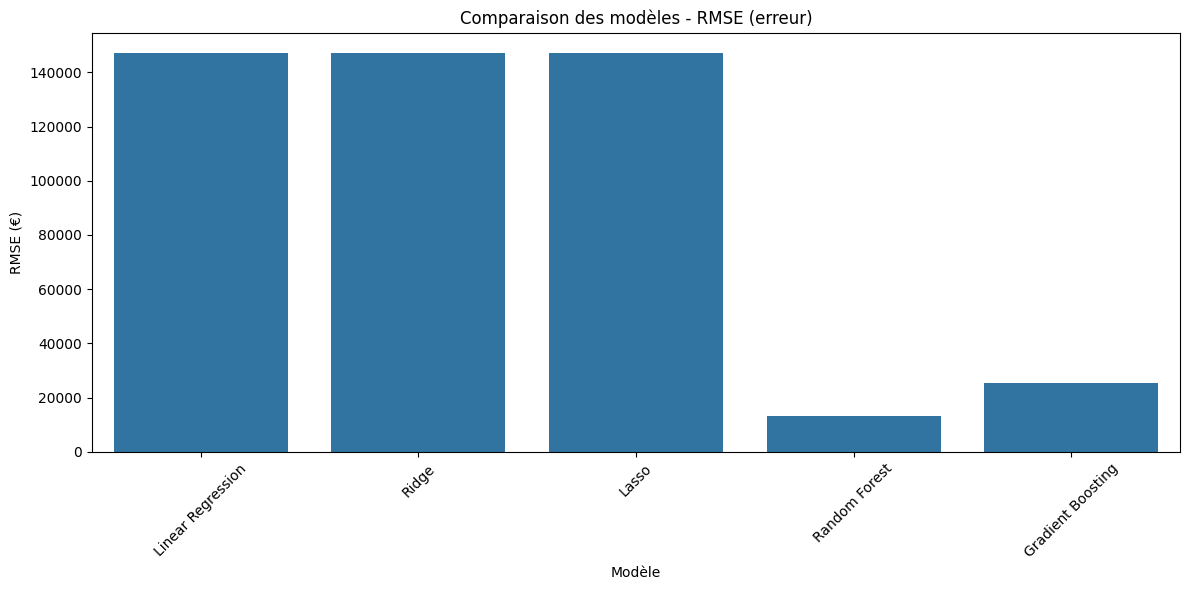

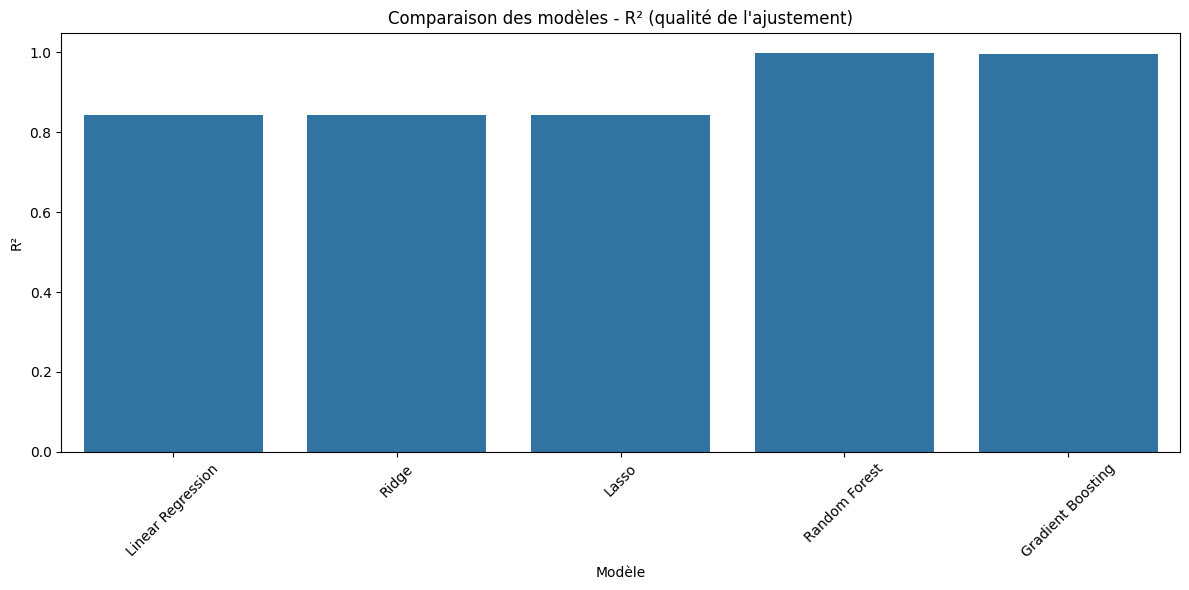

Meilleur modèle: Random Forest
R²: 0.9987
RMSE: 13371.54
Meilleur modèle sauvegardé dans: C:\Users\Marouane\ImmoPredict\models\best_model.pkl


In [15]:
# Visualisation des performances
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title('Comparaison des modèles - RMSE (erreur)')
plt.xlabel('Modèle')
plt.ylabel('RMSE (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['R²'])
plt.title('Comparaison des modèles - R² (qualité de l\'ajustement)')
plt.xlabel('Modèle')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11. Sélection et sauvegarde du meilleur modèle
best_model_name = results_df['R²'].idxmax()
best_model = models[best_model_name]

print(f"Meilleur modèle: {best_model_name}")
print(f"R²: {results_df.loc[best_model_name, 'R²']:.4f}")
print(f"RMSE: {results_df.loc[best_model_name, 'RMSE']:.2f}")

# Sauvegarde du meilleur modèle
model_path = os.path.join(project_root, 'models', 'best_model.pkl')
joblib.dump(best_model, model_path)
print(f"Meilleur modèle sauvegardé dans: {model_path}")

12. Analyse de l'importance des features (pour les modèles basés sur les arbres)

Nombre de features dans la liste 'features': 19
Nombre de features dans 'feature_importances_': 18
ATTENTION: Différence de longueur détectée!
Création de noms de features génériques...


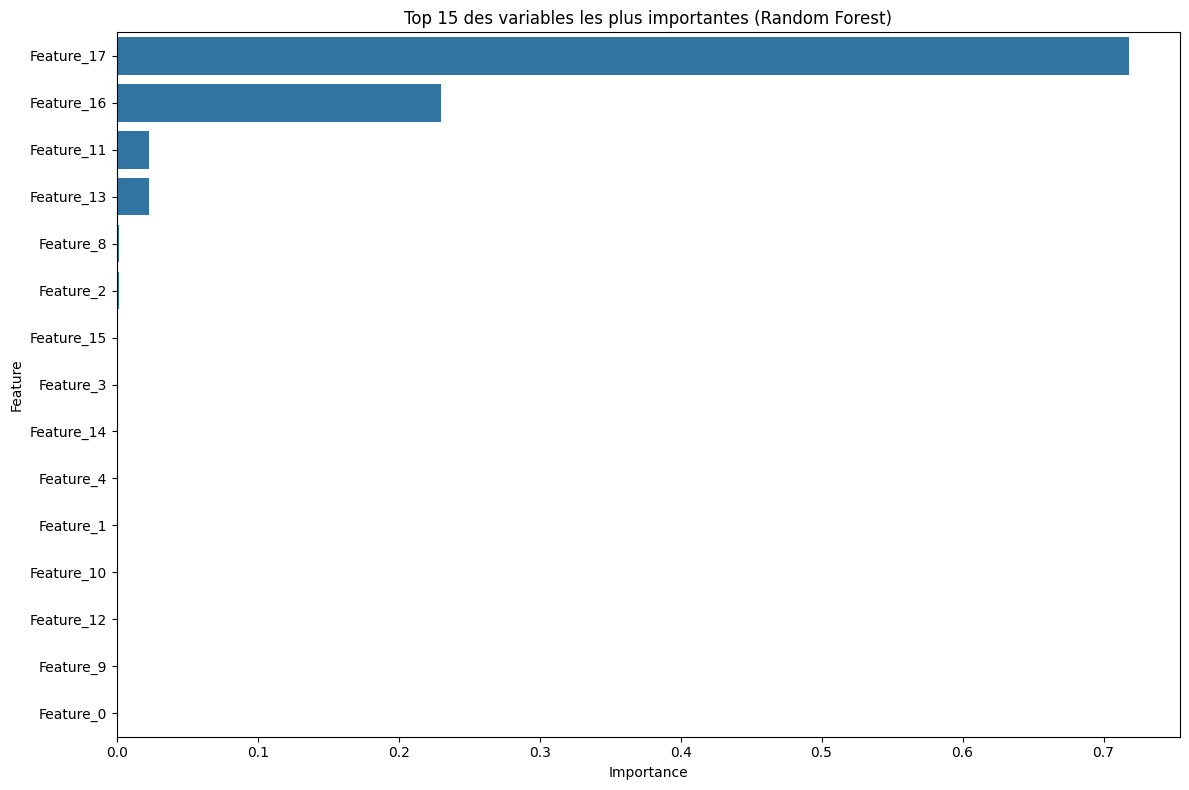

Importance des features sauvegardée dans: C:\Users\Marouane\ImmoPredict\models\feature_importance.csv


In [20]:
if hasattr(best_model, 'feature_importances_'):
    # Vérification des longueurs
    print(f"Nombre de features dans la liste 'features': {len(features)}")
    print(f"Nombre de features dans 'feature_importances_': {len(best_model.feature_importances_)}")
    
    # Si les longueurs sont différentes, utilisez uniquement les features utilisées par le modèle
    if len(features) != len(best_model.feature_importances_):
        print("ATTENTION: Différence de longueur détectée!")
        
        # Solution 1: Utiliser les noms de colonnes du modèle si disponible
        if hasattr(best_model, 'feature_names_in_'):
            print("Utilisation des noms de features du modèle...")
            model_features = best_model.feature_names_in_
            feature_importance = pd.DataFrame({
                'Feature': model_features,
                'Importance': best_model.feature_importances_
            })
        # Solution 2: Créer des noms génériques
        else:
            print("Création de noms de features génériques...")
            feature_importance = pd.DataFrame({
                'Feature': [f'Feature_{i}' for i in range(len(best_model.feature_importances_))],
                'Importance': best_model.feature_importances_
            })
    else:
        # Si les longueurs correspondent, procéder normalement
        feature_importance = pd.DataFrame({
            'Feature': features,
            'Importance': best_model.feature_importances_
        })
    
    # Tri par importance décroissante
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title(f'Top 15 des variables les plus importantes ({best_model_name})')
    plt.tight_layout()
    plt.show()
    
    # Sauvegarde de l'importance des features
    importance_path = os.path.join(project_root, 'models', 'feature_importance.csv')
    feature_importance.to_csv(importance_path, index=False)
    print(f"Importance des features sauvegardée dans: {importance_path}")